### Data Visualisation

“The simple graph has brought more information to the data analyst’s mind than any other device.” — John Tukey

We will use the London Bikes dataset, showing the number of bikes rented every day from 2010-2024, including variables such as temp, humidity etc

**Import the necessary libraries and dataset now**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

bikes = pd.read_csv('../Data/london_bikes.csv')
bikes

# Convert to datetime first
bikes['date'] = pd.to_datetime(bikes['date'])

# extract components
bikes["year"] = bikes["date"].dt.year
bikes["month"] = bikes["date"].dt.month
bikes["month_name"] = bikes["date"].dt.month_name()   # month label
bikes["day"] = bikes["date"].dt.day
bikes["day_of_week"] = bikes["date"].dt.day_name()     # weekday label
bikes['date'] = bikes['date'].dt.date


# create season_name based on numeric rules
bikes["season"] = np.select(
    [
        (bikes["month"].isin([12, 1, 2])),   # Winter: Dec, Jan, Feb
        (bikes["month"].isin([3, 4, 5])),    # Spring: Mar, Apr, May
        (bikes["month"].isin([6, 7, 8])),    # Summer: Jun, Jul, Aug
        (bikes["month"].isin([9, 10, 11]))   # Autumn: Sep, Oct, Nov
    ],
    ["Winter", "Spring", "Summer", "Autumn"], 
    default="Unknown"
)

# convert to ordered categorical, like fct_relevel in R
season_order = ["Winter", "Spring", "Summer", "Autumn"]
bikes["season"] = pd.Categorical(
    bikes["season"],
    categories=season_order,
    ordered=True
)

bikes

bikes

,date,bikes_hired,year,wday,month,week,cloud_cover,humidity,pressure,radiation,...,snow_depth,sunshine,mean_temp,min_temp,max_temp,weekend,month_name,day,day_of_week,season
0,2010-07-30,6897,2010,Fri,7,30,6.0,65.0,10147.0,157.0,...,NaN,31.0,17.7,12.3,25.1,False,July,30,Friday,Summer
1,2010-07-31,5564,2010,Sat,7,30,5.0,70.0,10116.0,184.0,...,NaN,47.0,21.1,17.0,23.9,True,July,31,Saturday,Summer
2,2010-08-01,4303,2010,Sun,8,30,7.0,63.0,10132.0,89.0,...,NaN,3.0,19.3,14.6,23.4,True,August,1,Sunday,Summer
3,2010-08-02,6642,2010,Mon,8,31,7.0,59.0,10168.0,134.0,...,NaN,20.0,19.5,15.6,23.6,False,August,2,Monday,Summer
4,2010-08-03,7966,2010,Tue,8,31,5.0,66.0,10157.0,169.0,...,NaN,39.0,17.9,12.1,20.1,False,August,3,Tuesday,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4929,2024-01-27,16959,2024,Sat,1,4,4.0,NaN,10331.0,39.0,...,0.0,21.0,4.5,NaN,12.2,True,January,27,Saturday,Winter
4930,2024-01-28,15540,2024,Sun,1,4,3.0,NaN,10230.0,63.0,...,0.0,59.0,6.6,NaN,12.5,True,January,28,Sunday,Winter
4931,2024-01-29,22839,2024,Mon,1,5,8.0,NaN,10222.0,18.0,...,0.0,0.0,8.8,NaN,8.8,False,January,29,Monday,Winter
4932,2024-01-30,22303,2024,Tue,1,5,8.0,NaN,10277.0,19.0,...,0.0,0.0,8.3,NaN,12.0,False,January,30,Tuesday,Winter


#### Histogram plot

<Axes: xlabel='bikes_hired', ylabel='Count'>

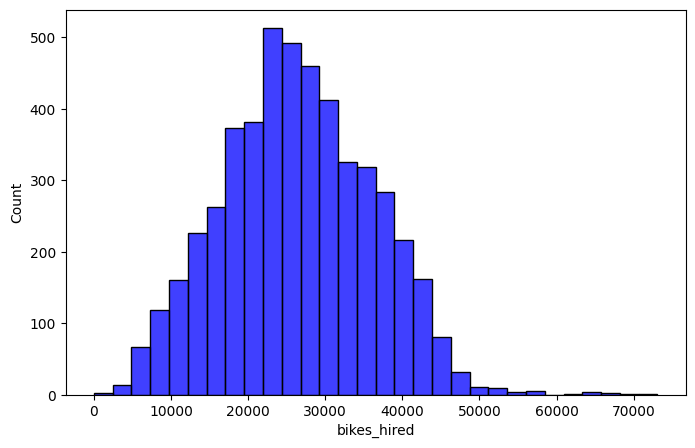

In [3]:
plt.figure(figsize=(8,5))
sns.histplot(bikes["bikes_hired"], bins=30, kde=False, color="blue")

In [ ]:
# create faceted histograms by month_name

# add titles and tidy style


**Density Plot**

In [ ]:
# Density plots of bikes hired by month and season


# add titles and tidy style


**Boxplots**

In [ ]:
# Boxplots of bikes hired by month and season


# add titles and tidy style


**Scatterplots**

In [ ]:
# Scatter plots of bikes hired vs mean_temp, faceted by season

# add titles and tidy style


**Time Series**

In [ ]:
# 30-day rolling mean as the smooth 


# Time series plot with trend line
